<h4>Developed by: Giovanni Abel Christian<br>

<img src="Diagram.jpg">

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.naive_bayes import MultinomialNB

## Data Exploration

In [159]:
dongeng = pd.read_excel("1000 data dongeng.xlsx", names = ["kalimat", "emosi"], header = None)  

dongeng

,kalimat,emosi
0,"Ketika kedua kalinya sang ibu menghampirinya, ...",marah
1,Pangeran Empang Kuala murka mendengar pinangan...,marah
2,Bujang Kelana akan menantang Pendekar Katung u...,marah
3,Pendekar Katung yang tidak terima dengan kekal...,marah
4,Ibunya sangat marah. ‘’ Dasar bodoh! Baju kesa...,marah
...,...,...
995,"Akan tetapi, ia dan rombongan terkejut sebab d...",terkejut
996,"Mendengar hal itu, Halimah sangat kaget dan te...",terkejut
997,Ketika aku memperhatikan domba-domba yang seda...,terkejut
998,Pada suatu hari beliau duduk di gua Hira dan t...,terkejut


In [160]:
dongeng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   kalimat  1000 non-null   object
 1   emosi    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [161]:
dongeng['emosi'].value_counts() 

senang      278
sedih       194
terkejut    183
marah       161
takut       136
jijik        48
Name: emosi, dtype: int64

<AxesSubplot:xlabel='emosi', ylabel='label count'>

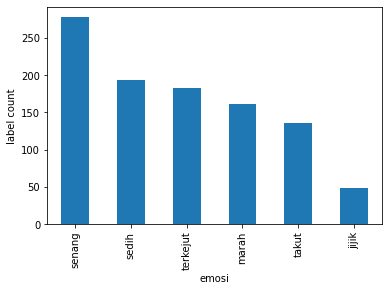

In [162]:
dongeng['emosi'].value_counts().plot(kind = 'bar', xlabel = 'emosi', ylabel = 'label count')

## Data Pre-processing

In [163]:
dongeng.iloc[149,:].values

array(['Jatuhnya Jayakarta ke tangan Kompeni Belanda pada tahun 1619 membuat banyak ulama marah.',
       'marah'], dtype=object)

### Removing digits using regex

In [164]:
for i in dongeng['kalimat']:
    newi = re.sub(r"[0-9]", "", i) 
    dongeng['kalimat'] = dongeng['kalimat'].replace(i,newi)

In [165]:
dongeng.iloc[149,:].values 

array(['Jatuhnya Jayakarta ke tangan Kompeni Belanda pada tahun  membuat banyak ulama marah.',
       'marah'], dtype=object)

### Word Stemming

In [166]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
 
kalimat = 'Jatuhnya Jayakarta ke tangan Kompeni Belanda pada tahun  membuat banyak ulama marah.'
katadasar = stemmer.stem(kalimat)

for i in dongeng['kalimat']: 
    newi = stemmer.stem(i)
    dongeng['kalimat'] = dongeng['kalimat'].replace(i,newi)

In [167]:
dongeng.iloc[149,:].values # menenujukan kalimat setelah stemming

array(['jatuh jayakarta ke tangan kompeni belanda pada tahun buat banyak ulama marah',
       'marah'], dtype=object)

### Stopwords Definition

In [168]:
#Mengimpor stop words bahasa Indonesia
factory = StopWordRemoverFactory() #menyimpan fungsi StopWirdRemoverFactory kedalam fungsi factory
stopwords = factory.get_stop_words() # Mengambil stop words dari variabel factory disimpan dalam variabel stopwords
print(stopwords) # Menampilkan kata-kata stopwords Bahasa Indonesia

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

## Data Spliting

In [169]:
X = dongeng.iloc[:, 0].values
y = dongeng.iloc[:, 1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [170]:
datatrain = {'kalimat': list(X_train), 'emosi':list(y_train)}
datatest = {'kalimat': list(X_test), 'emosi':list(y_test)} 
 
df_datatrain = pd.DataFrame(datatrain)
df_datatest = pd.DataFrame(datatest)

## Feature Extraction

### Create Bag of Words and Remove Stop Words

In [171]:
cv=CountVectorizer(stop_words= stopwords)
train_dtm=cv.fit_transform(X_train)
test_dtm=cv.transform(X_test)

In [172]:
test_bog = pd.DataFrame(train_dtm.toarray(), columns=cv.get_feature_names())

C:\Users\giova\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [173]:
test_bog[test_bog['jatuh'] == 1].loc[:,['jatuh','belanda', 'aku', 'banyak', 'tahun', 'hati', 'hari', 'kaget', 'marah', 'wajah']]

,jatuh,belanda,aku,banyak,tahun,hati,hari,kaget,marah,wajah
72,1,0,0,0,0,0,0,0,0,0
122,1,0,2,0,0,0,0,0,0,0
142,1,0,1,0,0,0,0,0,0,0
164,1,0,0,0,0,0,0,0,0,0
601,1,0,0,0,0,1,0,0,0,0
636,1,0,0,0,0,0,0,0,0,0


### Create TF-IDF and Remove Stop Words

In [174]:
tf_cv=TfidfVectorizer(stop_words= stopwords)
train_dtm_tf=tf_cv.fit_transform(X_train)
test_dtm_tf=tf_cv.transform(X_test)

In [175]:
test_tf = pd.DataFrame(train_dtm_tf.toarray(), columns=tf_cv.get_feature_names())

C:\Users\giova\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [176]:
test_tf[test_tf['jatuh'] != 0].loc[:,['jatuh','belanda', 'aku', 'banyak', 'tahun', 'hati', 'hari', 'kaget', 'marah', 'wajah']]

,jatuh,belanda,aku,banyak,tahun,hati,hari,kaget,marah,wajah
72,0.391826,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
122,0.459085,0.0,0.635413,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
142,0.336199,0.0,0.232664,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
164,0.331937,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
601,0.289325,0.0,0.000000,0.0,0.0,0.20147,0.0,0.0,0.0,0.0
636,0.259023,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


## Model Training

## Model using Bag of Words

In [177]:
#Model fitting
nb=MultinomialNB(alpha = 1.0)
nb=nb.fit(train_dtm,y_train)

In [178]:
predicted=nb.predict(test_dtm)
score=nb.score(test_dtm,y_test)
score2=score*100.0
print('Accuracy of Naive Bayes :')
print(score2)

Accuracy of Naive Bayes :
80.0


In [179]:
cm_bow = metrics.classification_report(y_test,predicted,target_names=dongeng['emosi'].unique().tolist())

In [180]:
print(cm_bow)

              precision    recall  f1-score   support

       marah       0.50      0.33      0.40         9
       jijik       0.85      0.76      0.80        37
       takut       0.80      0.80      0.80        45
      senang       0.83      0.88      0.86        51
       sedih       0.81      0.92      0.86        24
    terkejut       0.74      0.76      0.75        34

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.80      0.80      0.80       200



In [181]:
cm_bow = metrics.classification_report(y_test,predicted,target_names=dongeng['emosi'].unique(), output_dict = True)

In [182]:
acc1 = cm_bow['accuracy']
prec1 = cm_bow['weighted avg']['precision']
reca1 = cm_bow['weighted avg']['recall']

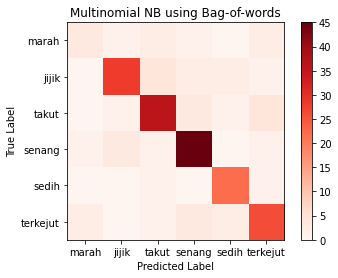

In [183]:
conf_mat = confusion_matrix(y_test, predicted)
labels = dongeng['emosi'].unique().tolist()

plt.figure()
plt.title("Multinomial NB using Bag-of-words")
# plt.title("Heat Map Confusion Matrix")
plt.imshow(conf_mat, interpolation="nearest", cmap=plt.cm.Reds)
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()

## Model using TF-IDF

In [184]:
nb=MultinomialNB(alpha = 1)
nb.fit(train_dtm_tf,y_train)

MultinomialNB(alpha=1)

In [185]:
prdicted=nb.predict(test_dtm_tf)
print("Accuracy of Naive Bayes Algo:")
score4=100.0* nb.score(test_dtm_tf,y_test)
print(score)

Accuracy of Naive Bayes Algo:
0.8


In [186]:
from sklearn import metrics
print(metrics.classification_report(y_test,prdicted,target_names=dongeng['emosi'].unique().tolist(), zero_division = 1))

              precision    recall  f1-score   support

       marah       1.00      0.00      0.00         9
       jijik       0.87      0.35      0.50        37
       takut       0.84      0.71      0.77        45
      senang       0.50      1.00      0.66        51
       sedih       0.87      0.54      0.67        24
    terkejut       0.79      0.68      0.73        34

    accuracy                           0.66       200
   macro avg       0.81      0.55      0.56       200
weighted avg       0.76      0.66      0.64       200



In [187]:
cm_tfidf = metrics.classification_report(y_test,prdicted,target_names=dongeng['emosi'].unique(), output_dict = True)

C:\Users\giova\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giova\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giova\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
acc2 = cm_tfidf['accuracy']
prec2 = cm_tfidf['weighted avg']['precision']
reca2 = cm_tfidf['weighted avg']['recall']

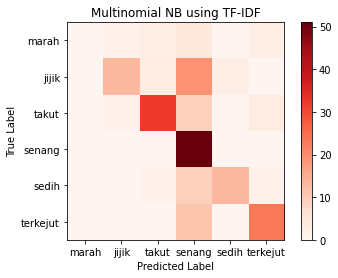

In [189]:
conf_mat = confusion_matrix(y_test, prdicted)
labels = dongeng['emosi'].unique().tolist()

plt.figure()
plt.title("Multinomial NB using TF-IDF")
plt.imshow(conf_mat, interpolation="nearest", cmap=plt.cm.Reds)
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()

### Model Comparison

In [190]:
data = {'MultinomialNB bag-of-words': [acc1, prec1, reca1] ,  'MultinomialNB TF-IDF': [acc2, prec2, reca2] }  
  
# Creates pandas DataFrame.  
df = pd.DataFrame(data, index = ['accuracy', 'precision', 'recall'])  
  
# print the data  
round(df,3)

,MultinomialNB bag-of-words,MultinomialNB TF-IDF
accuracy,0.800,0.660
precision,0.796,0.715
recall,0.800,0.660


References:
- Regex Filtering: Malik, Usman. “Using Regex for Text Manipulation in Python.” Stack Abuse, Accessed on April 16 2021, https://stackabuse.com/using-regex-for-text-manipulation-in-python/
- Naive Bayes model training dan Classification Report: Singh, Shubham. “INTRODUCTION TO TEXT CLASSIFICATION AND NAIVE BAYES CLASSIFIER.” Kaggle, May 21 2020, https://www.kaggle.com/shub99/text-classification-and-naive-bayes-classifier
- Heatmap Confusion Matrix: Lee, Jay. “Document Classification using Naive Bayes Method.” Kaggle, February 7 2019, https://www.kaggle.com/jayaos/document-classification-using-naive-bayes-method
- Bag of words dan TF-IDF: Yordanov, Ventsislav. "Introduction to Natural Language Processing for Text" medium,  November 17 2018, https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63
- Stop words Bahasa Indonesia: Yulio, Anggi. "Stopword Removal Bahasa Indonesia dengan Python Sastrawi" devtrik,  June 3 2017, https://devtrik.com/python/stopword-removal-bahasa-indonesia-python-sastrawi/
- Stemming Bahasa Indonesia: Yulio, Anggi. "Steeming Bahasa Indonesia dengan Python Sastrawi" devtrik,  May 22 2017,https://devtrik.com/python/steeming-bahasa-indonesia-python-sastrawi/